## ライブラリのインポート

In [1]:
import numpy as np
import matplotlib.pyplot as plt

自作ライブラリのインポート

In [2]:
from main import MiddleLayer, OutputLayer, sigmoid, sigmoid_dash, softmax, error_dash

## データの作成

In [3]:
i_range = np.arange(-1.0, 1.1, 0.1)
j_range = np.arange(-1.0, 1.1, 0.1)

X = np.array([[i, j] for i in  i_range for j in j_range])
Y = np.array([[0, 1] if j < np.sin(np.pi * i) else [1, 0] for i in i_range for j in j_range])

sin_data = np.sin(np.pi * X)

描画用関数

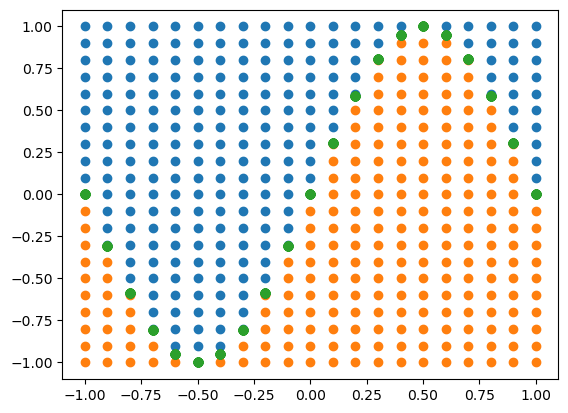

In [4]:
def plot(Y_dash=None):
    
    A = [[], []]
    B = [[], []]

    for (a, b), P in zip(X, Y if Y_dash is None else Y_dash):
        idx = P.argmax()
        A[idx].append(a)
        B[idx].append(b)

    plt.scatter(A[0], B[0])
    plt.scatter(A[1], B[1])
    plt.scatter(X, sin_data)
    plt.show()

plot()

## デモ

layer を作成

In [5]:
Layers = []

Layers.append(MiddleLayer(2, 6, activation_func=sigmoid, activation_func_dash=sigmoid_dash))
Layers.append(OutputLayer(6, 2, activation_func=softmax, error_func_dash=error_dash))

重みとバイアスの確認

In [6]:
Layers[0].W, Layers[0].b

(array([[-0.00034029, -0.0009558 ,  0.00419852,  0.00275058, -0.00782499,
          0.00767154],
        [ 0.0121065 , -0.01116908,  0.00492121,  0.00214014, -0.02404259,
         -0.00552706]]),
 array([-0.01410445, -0.00286468,  0.01553355, -0.00124399,  0.0187155 ,
        -0.00547427]))

順伝播(=無学習の状態で予測)

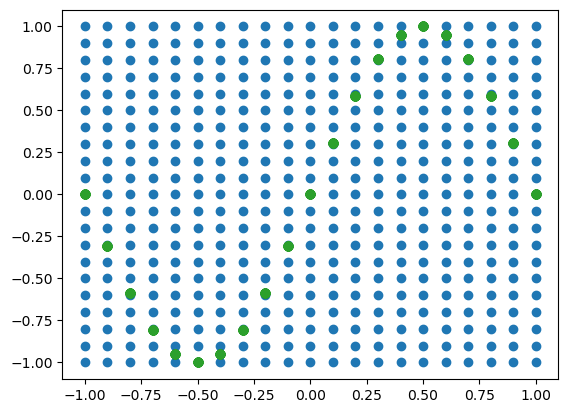

In [7]:
Y1 = Layers[0].forward(X)
Y_dash = Layers[1].forward(Y1)

plot(Y_dash)

逆伝播(=初めての学習)

In [8]:
dY1 = Layers[1].backward(Y)
_ = Layers[0].backward(dY1)

順伝播(2回目)

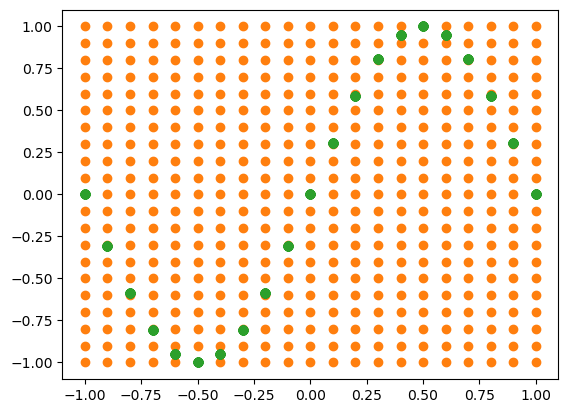

In [9]:
Y1 = Layers[0].forward(X)
Y_dash = Layers[1].forward(Y1)

plot(Y_dash)

重みとバイアスが更新されたことを確認

In [10]:
Layers[0].W, Layers[0].b

(array([[ 0.03411808, -0.02428041, -0.00374551, -0.02070534, -0.0583017 ,
          0.00785056],
        [-0.02193091,  0.01187067,  0.01276831,  0.0253099 ,  0.02581375,
         -0.0057039 ]]),
 array([-0.01123449, -0.00480969,  0.01487118, -0.00319963,  0.01451479,
        -0.00545934]))

## 学習

layer の作成

In [11]:
Layers = []

Layers.append(MiddleLayer(2, 6, activation_func=sigmoid, activation_func_dash=sigmoid_dash))
Layers.append(OutputLayer(6, 2, activation_func=softmax, error_func_dash=error_dash))

設定

In [12]:
epoch = 101
batch = 10
n_data = len(X)
interval = 10

エポックごとに学習

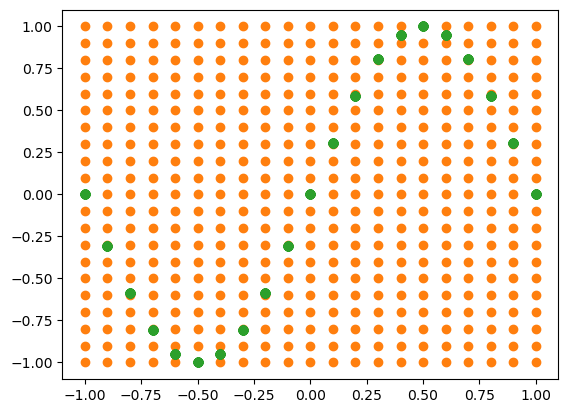

Epoch: 0/101 Error: 0.680218087486045


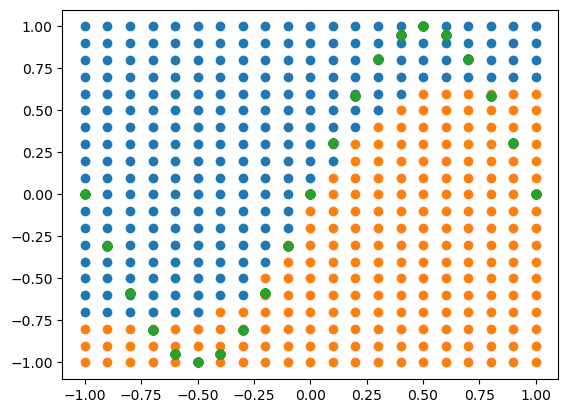

Epoch: 10/101 Error: 0.2776582799132478


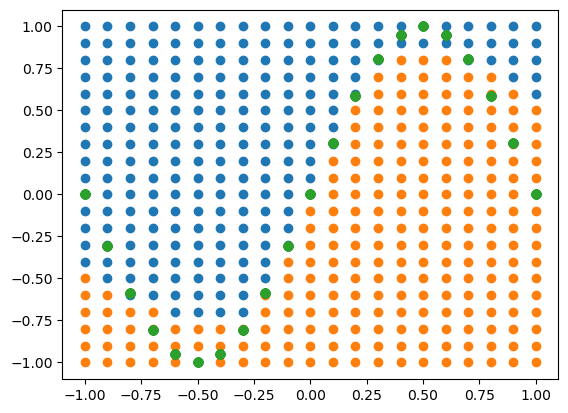

Epoch: 20/101 Error: 0.19433492605346925


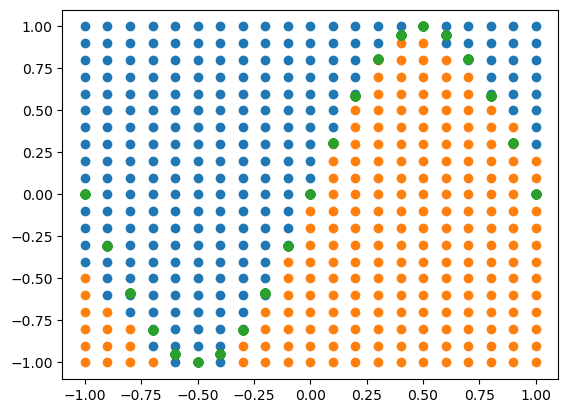

Epoch: 30/101 Error: 0.13921721804689674


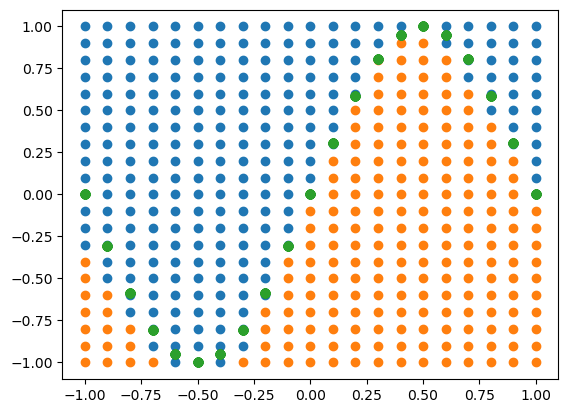

Epoch: 40/101 Error: 0.10933779195228593


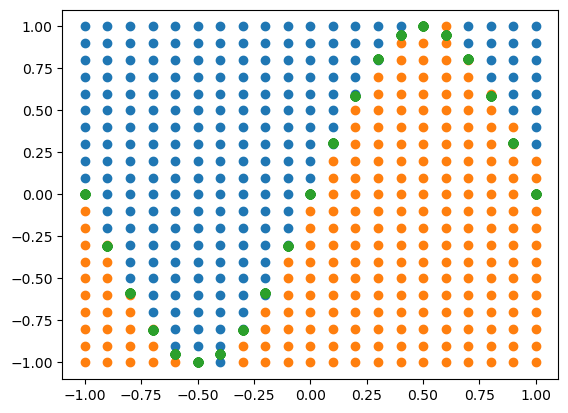

Epoch: 50/101 Error: 0.0832020365218211


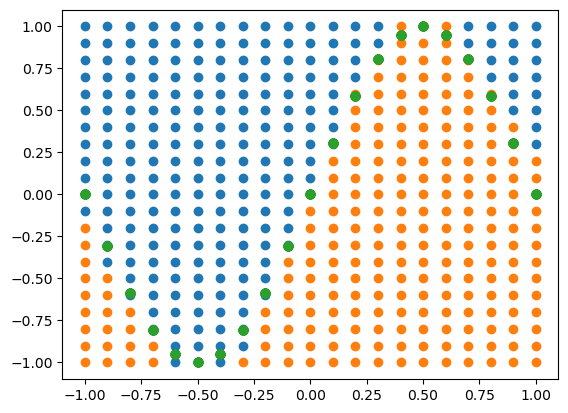

Epoch: 60/101 Error: 0.07998615163850922


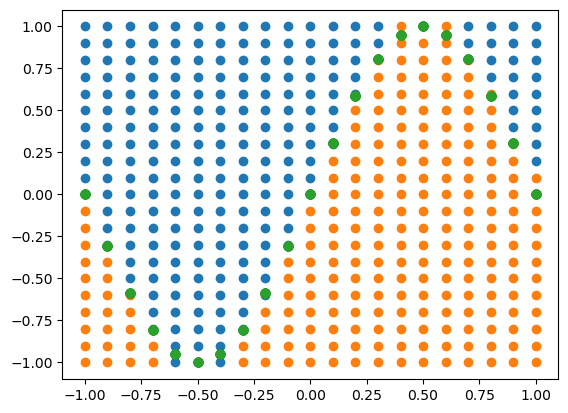

Epoch: 70/101 Error: 0.06167678432663817


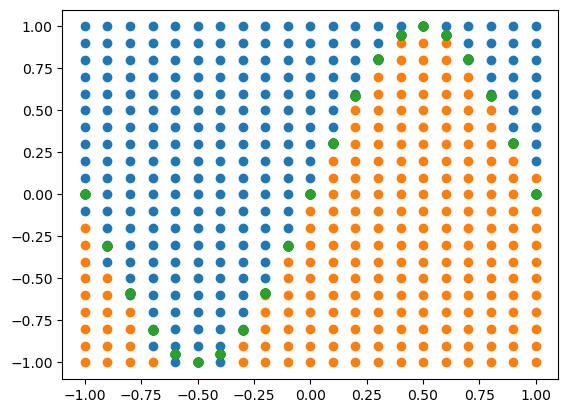

Epoch: 80/101 Error: 0.06233796214894897


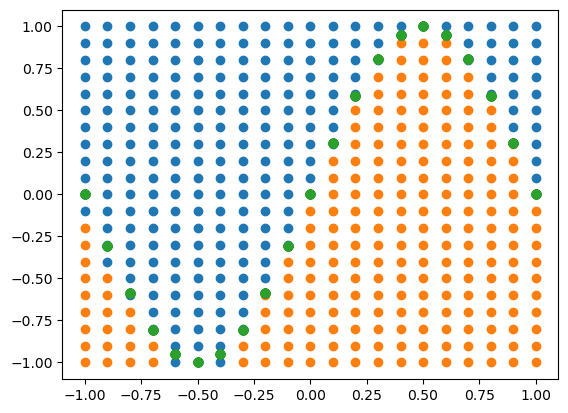

Epoch: 90/101 Error: 0.05636672334327766


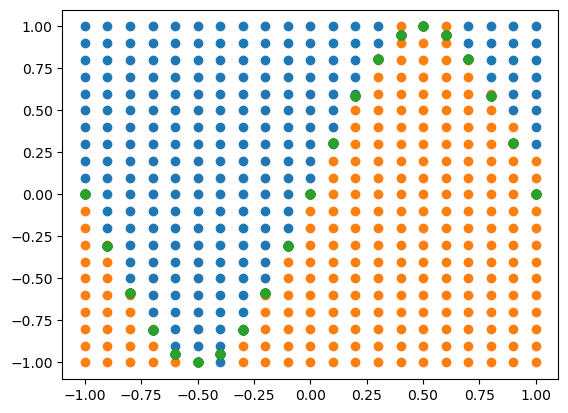

Epoch: 100/101 Error: 0.05655324062993107


In [13]:
for i in range(epoch):
    index_random = np.arange(n_data)
    np.random.shuffle(index_random)

    for j in range(0, n_data, batch):
        idx = index_random[j: j + batch]

        tX, tY = X[idx], Y[idx]

        for layer in Layers:
            tX = layer.forward(tX)

        for layer in Layers[::-1]:
            tY = layer.backward(tY)
    
    if i % interval == 0:
        Y_dash = X[::]

        for layer in Layers:
            Y_dash = layer.forward(Y_dash)

        total_error = -np.sum(Y * np.log(Y_dash + 1e-7))

        plot(Y_dash)
        print(f"Epoch: {i}/{epoch}", f"Error: {total_error / n_data}")

## 本

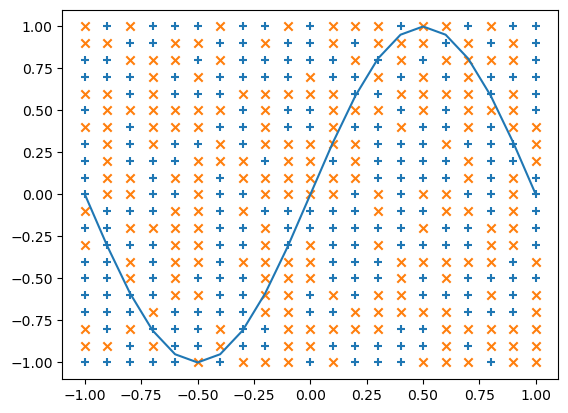

Epoch:0/101 Error:0.7277853115658285


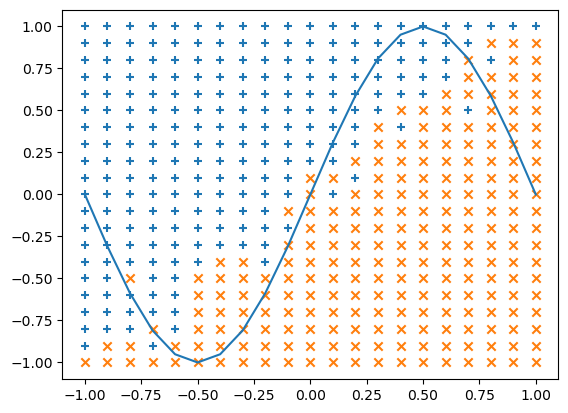

Epoch:10/101 Error:0.37675376728862414


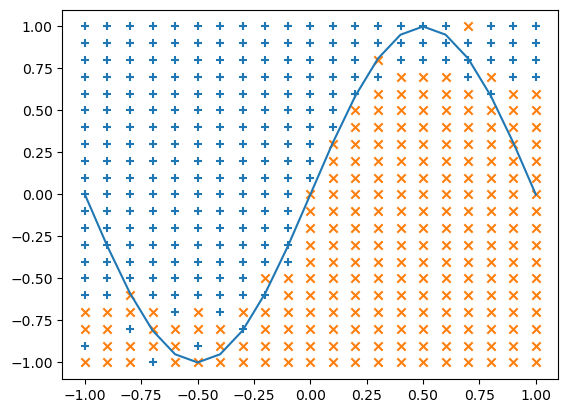

Epoch:20/101 Error:0.24174142019071398


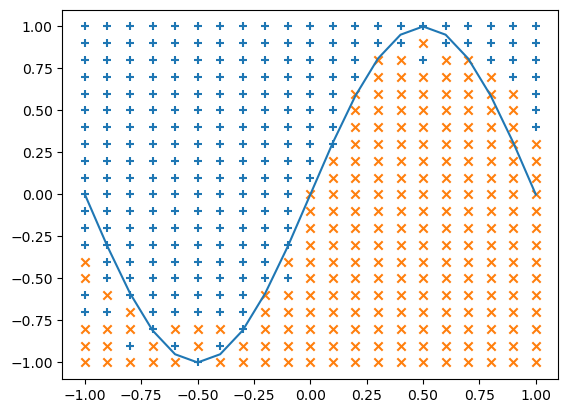

Epoch:30/101 Error:0.17580387057556968


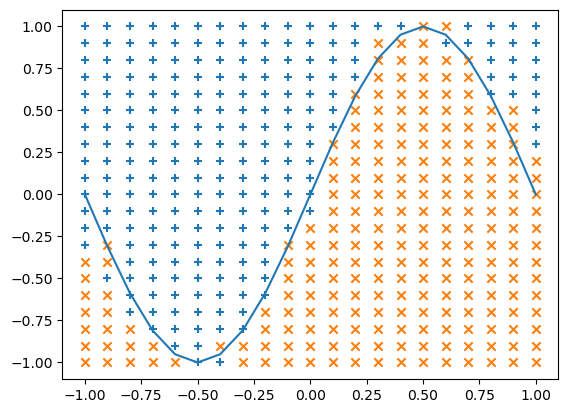

Epoch:40/101 Error:0.13610154081641465


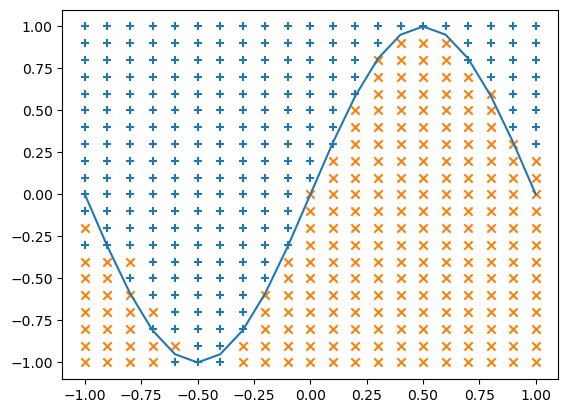

Epoch:50/101 Error:0.10252003976247523


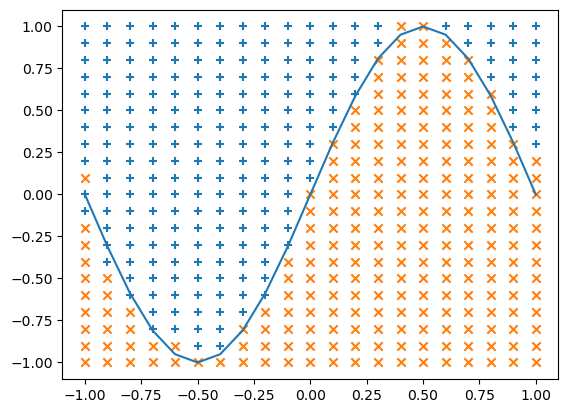

Epoch:60/101 Error:0.08545123118680915


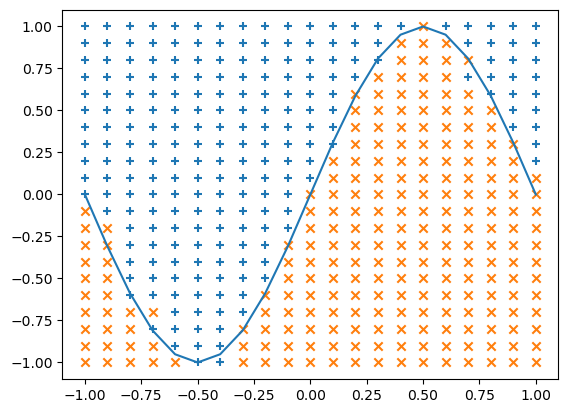

Epoch:70/101 Error:0.08503531757190468


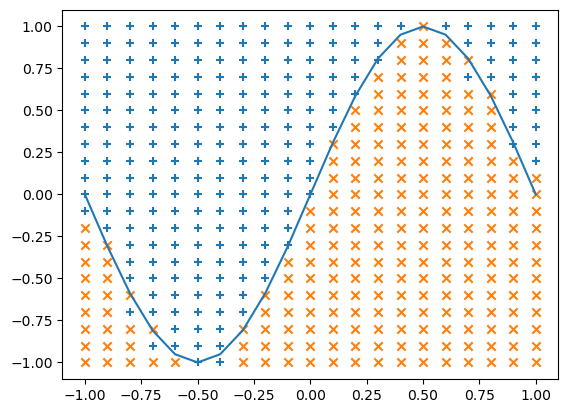

Epoch:80/101 Error:0.07091512248153041


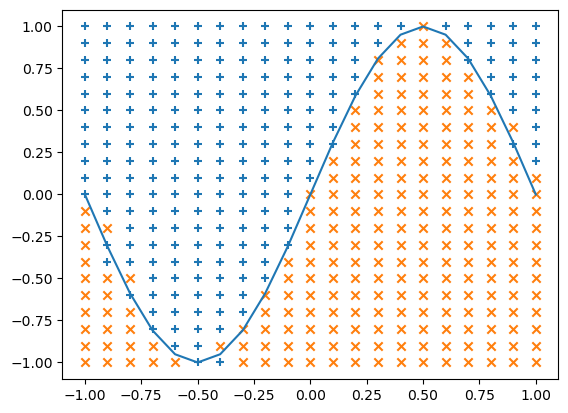

Epoch:90/101 Error:0.06970423523750723


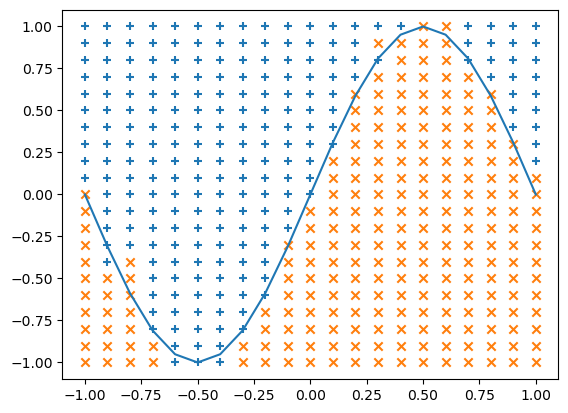

Epoch:100/101 Error:0.06855058756678141


In [14]:
X = np.arange(-1.0, 1.1, 0.1)
Y = np.arange(-1.0, 1.1, 0.1)

input_data = []
correct_data = []

for x in X:
    for y in Y:
        input_data.append([x, y])
        if y < np.sin(np.pi * x):
            correct_data.append([0, 1])
        else:
            correct_data.append([1, 0])

n_data = len(correct_data)

input_data = np.array(input_data)
correct_data = np.array(correct_data)

n_in = 2
n_mid = 6
n_out = 2

epoch = 101
interval = 10

Layers = []

Layers.append(MiddleLayer(2, 6, activation_func=sigmoid, activation_func_dash=sigmoid_dash))
Layers.append(OutputLayer(6, 2, activation_func=softmax, error_func_dash=error_dash))

sin_data = np.sin(np.pi * X)

for i in range(epoch):
    index_random = np.arange(n_data)
    np.random.shuffle(index_random)

    total_error = 0
    x_1 = []
    y_1 = []
    x_2 = []
    y_2 = []

    for idx in index_random:

        x = input_data[idx]
        t = correct_data[idx]

        X_ = x.reshape(1, 2)

        for layer in Layers:
            X_ = layer.forward(X_)
        
        T = t.reshape(1, 2)

        for layer in Layers[::-1]:
            T = layer.backward(T)

        if i % interval == 0:
            y = Layers[-1].Y.reshape(-1)
            total_error += -np.sum(t * np.log(y + 1e-7))

            if y[0] > y[1]:
                x_1.append(x[0])
                y_1.append(x[1])
            else:
                x_2.append(x[0])
                y_2.append(x[1])
                
    if i % interval == 0:
        plt.plot(X, sin_data)
        plt.scatter(x_1, y_1, marker="+")
        plt.scatter(x_2, y_2, marker="x")
        plt.show()
        print("Epoch:" + str(i) + "/" + str(epoch), "Error:" + str(total_error/n_data))